In [1]:
from IPython.display import display

import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import catboost
import datetime
import json

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



plt.style.use('ggplot')

ImportError: No module named 'catboost'

In [187]:
with open('competition_data_v2/dictionaries/heroes.json') as f:
    heroes = json.load(f)

t - транспонируем, переворачиваем чтоб сроки стали столбцами

In [188]:
pd.DataFrame(heroes).T

,agi_gain,attack_range,attack_rate,attack_type,base_agi,base_armor,base_attack_max,base_attack_min,base_health,base_health_regen,base_int,base_mana,base_mana_regen,base_mr,base_str,cm_enabled,icon,id,img,int_gain,legs,localized_name,move_speed,name,primary_attr,projectile_speed,roles,str_gain,turn_rate
1,2.8,150,1.45,Melee,22,-1,31,27,200,1.5,12,75,0.9,25,22,True,/apps/dota2/images/heroes/antimage_icon.png,1,/apps/dota2/images/heroes/antimage_full.png?,1.8,2,Anti-Mage,310,npc_dota_hero_antimage,agi,0,"[Carry, Escape, Nuker]",1.3,0.5
10,3.7,350,1.5,Ranged,24,-2,18,9,200,1.5,13,75,0.9,25,19,True,/apps/dota2/images/heroes/morphling_icon.png,10,/apps/dota2/images/heroes/morphling_full.png?,1.1,0,Morphling,280,npc_dota_hero_morphling,agi,1300,"[Carry, Escape, Durable, Nuker, Disabler]",2.3,0.6
100,2.1,150,1.7,Melee,23,0,31,27,200,1.5,18,75,0.9,25,23,True,/apps/dota2/images/heroes/tusk_icon.png,100,/apps/dota2/images/heroes/tusk_full.png?,1.7,2,Tusk,300,npc_dota_hero_tusk,str,900,"[Initiator, Disabler, Nuker]",2.6,0.7
101,0.8,600,1.7,Ranged,13,-2,22,12,200,1.5,27,75,0.9,25,19,True,/apps/dota2/images/heroes/skywrath_mage_icon.png,101,/apps/dota2/images/heroes/skywrath_mage_full.png?,3.6,2,Skywrath Mage,330,npc_dota_hero_skywrath_mage,int,1000,"[Support, Nuker, Disabler]",1.8,0.5
102,1.5,150,1.7,Melee,17,-1,42,32,200,1.5,21,75,0.9,25,23,True,/apps/dota2/images/heroes/abaddon_icon.png,102,/apps/dota2/images/heroes/abaddon_full.png?,2,2,Abaddon,310,npc_dota_hero_abaddon,str,900,"[Support, Carry, Durable]",2.6,0.5
103,1.8,150,1.7,Melee,14,1,33,23,200,1.5,23,75,0.9,25,24,True,/apps/dota2/images/heroes/elder_titan_icon.png,103,/apps/dota2/images/heroes/elder_titan_full.png?,1.6,2,Elder Titan,315,npc_dota_hero_elder_titan,str,900,"[Initiator, Disabler, Nuker, Durable]",2.6,0.5
104,1.7,150,1.7,Melee,18,0,39,35,200,1.5,20,75,0.9,25,26,True,/apps/dota2/images/heroes/legion_commander_ico...,104,/apps/dota2/images/heroes/legion_commander_ful...,2.2,2,Legion Commander,320,npc_dota_hero_legion_commander,str,900,"[Carry, Disabler, Initiator, Durable, Nuker]",2.9,0.5
105,1.3,700,1.7,Ranged,14,5,9,7,200,1.5,22,75,0.9,25,17,True,/apps/dota2/images/heroes/techies_icon.png,105,/apps/dota2/images/heroes/techies_full.png?,2.9,6,Techies,270,npc_dota_hero_techies,int,900,"[Nuker, Disabler]",2.3,0.5
106,1.8,150,1.7,Melee,22,-2,34,30,200,2,20,75,0.9,25,19,True,/apps/dota2/images/heroes/ember_spirit_icon.png,106,/apps/dota2/images/heroes/ember_spirit_full.png?,1.8,2,Ember Spirit,305,npc_dota_hero_ember_spirit,agi,900,"[Carry, Escape, Nuker, Disabler, Initiator]",2.1,0.5
107,1.5,150,1.7,Melee,17,1,35,25,200,1.5,18,75,0.9,25,21,True,/apps/dota2/images/heroes/earth_spirit_icon.png,107,/apps/dota2/images/heroes/earth_spirit_full.png?,2.1,2,Earth Spirit,290,npc_dota_hero_earth_spirit,str,900,"[Nuker, Escape, Disabler, Initiator, Durable]",3.2,0.6


In [189]:
heroes = {
    int(hero_id): hero_params
    for hero_id, hero_params in heroes.items()
}

In [190]:
df_heroes = pd.DataFrame(heroes).T

In [191]:
df_heroes.head(4)

,agi_gain,attack_range,attack_rate,attack_type,base_agi,base_armor,base_attack_max,base_attack_min,base_health,base_health_regen,base_int,base_mana,base_mana_regen,base_mr,base_str,cm_enabled,icon,id,img,int_gain,legs,localized_name,move_speed,name,primary_attr,projectile_speed,roles,str_gain,turn_rate
1,2.8,150,1.45,Melee,22,-1,31,27,200,1.5,12,75,0.9,25,22,True,/apps/dota2/images/heroes/antimage_icon.png,1,/apps/dota2/images/heroes/antimage_full.png?,1.8,2,Anti-Mage,310,npc_dota_hero_antimage,agi,0,"[Carry, Escape, Nuker]",1.3,0.5
2,2.2,150,1.7,Melee,20,-1,28,24,200,4.25,18,75,0.9,25,25,True,/apps/dota2/images/heroes/axe_icon.png,2,/apps/dota2/images/heroes/axe_full.png?,1.6,2,Axe,290,npc_dota_hero_axe,str,900,"[Initiator, Durable, Disabler, Jungler]",2.8,0.6
3,2.4,400,1.7,Ranged,23,1,43,37,200,1.5,23,75,0.9,25,23,True,/apps/dota2/images/heroes/bane_icon.png,3,/apps/dota2/images/heroes/bane_full.png?,2.4,4,Bane,310,npc_dota_hero_bane,int,900,"[Support, Disabler, Nuker, Durable]",2.4,0.6
4,3,150,1.7,Melee,24,0,39,33,200,1.5,18,75,0.9,25,23,True,/apps/dota2/images/heroes/bloodseeker_icon.png,4,/apps/dota2/images/heroes/bloodseeker_full.png?,1.7,2,Bloodseeker,285,npc_dota_hero_bloodseeker,agi,900,"[Carry, Disabler, Jungler, Nuker, Initiator]",2.7,0.5


In [192]:
x = pd.read_csv('competition_data_v2/train_v2.csv', index_col=0)
y = pd.read_csv('competition_data_v2/target.csv', index_col=0)['radiant_won']

In [193]:
x = x.join(df_heroes.add_prefix('r1_'), on='r1_hero')

In [194]:
x = x.join(df_heroes.add_prefix('r2_'), on='r2_hero')

In [195]:
x = x.join(df_heroes.add_prefix('r3_'), on='r3_hero')

In [196]:
x = x.join(df_heroes.add_prefix('r4_'), on='r4_hero')

In [197]:
x = x.join(df_heroes.add_prefix('r5_'), on='r5_hero')

In [198]:
x = x.join(df_heroes.add_prefix('d1_'), on='d1_hero')

In [199]:
x = x.join(df_heroes.add_prefix('d2_'), on='d2_hero')

In [200]:
x = x.join(df_heroes.add_prefix('d3_'), on='d3_hero')

In [201]:
x = x.join(df_heroes.add_prefix('d4_'), on='d4_hero')

In [202]:
x = x.join(df_heroes.add_prefix('d5_'), on='d5_hero')

In [203]:
def xptolvl(xp):

    if xp >= 27500:
        return 25
    elif xp >= 24525:
        return 24
    elif xp >= 22025:
        return 23
    elif xp >= 19825:
        return 22
    elif xp >= 17925:
        return 21
    elif xp >= 16325:
        return 20
    elif xp >= 14900:
        return 19
    elif xp >= 13500:
        return 18
    elif xp >= 12125:
        return 17
    elif xp >= 10850:
        return 16
    elif xp >= 9600:
        return 15
    elif xp >= 8375:
        return 14
    elif xp >= 7175:
        return 13
    elif xp >= 6000:
        return 12
    elif xp >= 5225:
        return 11
    elif xp >= 4550:
        return 10
    elif xp >= 3890:
        return 9
    elif xp >= 3425:
        return 8
    elif xp >= 2615:
        return 7
    elif xp >= 2000:
        return 6
    elif xp >= 1400:
        return 5
    elif xp >= 900:
        return 4
    elif xp >= 500:
        return 3
    elif xp >= 200:
        return 2
    elif xp >= 0:
        return 1

In [204]:
x['r1_lvl'] = x['r1_xp'].apply(xptolvl)
x['r2_lvl'] = x['r2_xp'].apply(xptolvl)
x['r3_lvl'] = x['r3_xp'].apply(xptolvl)
x['r4_lvl'] = x['r4_xp'].apply(xptolvl)
x['r5_lvl'] = x['r5_xp'].apply(xptolvl)
x['d1_lvl'] = x['d1_xp'].apply(xptolvl)
x['d2_lvl'] = x['d2_xp'].apply(xptolvl)
x['d3_lvl'] = x['d3_xp'].apply(xptolvl)
x['d4_lvl'] = x['d4_xp'].apply(xptolvl)
x['d5_lvl'] = x['d5_xp'].apply(xptolvl)

In [205]:
x['r1_health'] = 200 + 20*x['r1_lvl']*x['r1_str_gain'] + 20*x['r1_base_str']

In [206]:
x['r2_health'] = 200 + 20*x['r2_lvl']*x['r2_str_gain'] + 20*x['r2_base_str']
x['r3_health'] = 200 + 20*x['r3_lvl']*x['r3_str_gain'] + 20*x['r3_base_str']
x['r4_health'] = 200 + 20*x['r4_lvl']*x['r4_str_gain'] + 20*x['r4_base_str']
x['r5_health'] = 200 + 20*x['r5_lvl']*x['r5_str_gain'] + 20*x['r5_base_str']
x['d1_health'] = 200 + 20*x['d1_lvl']*x['d1_str_gain'] + 20*x['d1_base_str']
x['d2_health'] = 200 + 20*x['d2_lvl']*x['d2_str_gain'] + 20*x['d2_base_str']
x['d3_health'] = 200 + 20*x['d3_lvl']*x['d3_str_gain'] + 20*x['d3_base_str']
x['d4_health'] = 200 + 20*x['d4_lvl']*x['d4_str_gain'] + 20*x['d4_base_str']
x['d5_health'] = 200 + 20*x['d5_lvl']*x['d5_str_gain'] + 20*x['d5_base_str']


In [207]:
x.head(7)

,lobby_type,r1_hero,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r1_role,r1_avg_tower_damage_per_min,r1_avg_kda,r2_hero,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r2_role,r2_avg_tower_damage_per_min,r2_avg_kda,r3_hero,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r3_role,r3_avg_tower_damage_per_min,r3_avg_kda,r4_hero,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r4_role,r4_avg_tower_damage_per_min,r4_avg_kda,r5_hero,r5_xp,r5_gold,r5_lh,r5_kills,r5_deaths,r5_items,r5_role,r5_avg_tower_damage_per_min,r5_avg_kda,d1_hero,d1_xp,d1_gold,d1_lh,d1_kills,d1_deaths,d1_items,d1_role,d1_avg_tower_damage_per_min,d1_avg_kda,d2_hero,d2_xp,d2_gold,d2_lh,d2_kills,d2_deaths,d2_items,d2_role,d2_avg_tower_damage_per_min,d2_avg_kda,d3_hero,d3_xp,d3_gold,d3_lh,d3_kills,d3_deaths,d3_items,d3_role,d3_avg_tower_damage_per_min,d3_avg_kda,d4_hero,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d4_role,d4_avg_tower_damage_per_min,d4_avg_kda,d5_hero,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,d5_role,d5_avg_tower_damage_per_min,d5_avg_kda,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_blink_time,radiant_gem_time,radiant_ghost_time,radiant_travel_boots_time,radiant_hand_of_midas_time,radiant_mekansm_time,radiant_vladmir_time,radiant_pipe_time,radiant_urn_of_shadows_time,radiant_sheepstick_time,radiant_recipe_orchid_time,radiant_orchid_time,radiant_bloodthorn_time,radiant_echo_sabre_time,radiant_cyclone_time,radiant_force_staff_time,radiant_hurricane_pike_time,radiant_necronomicon_time,radiant_dagon_time,radiant_refresher_time,radiant_assault_time,radiant_black_king_bar_time,radiant_aegis_time,radiant_shivas_guard_time,radiant_bloodstone_time,radiant_sphere_time,radiant_lotus_orb_time,radiant_meteor_hammer_time,radiant_nullifier_time,radiant_combo_breaker_time,radiant_trident_time,radiant_refresher_shard_time,radiant_spirit_vessel_time,radiant_vanguard_time,radiant_crimson_guard_time,radiant_blade_mail_time,radiant_hood_of_defiance_time,radiant_rapier_time,radiant_monkey_king_bar_time,radiant_radiance_time,radiant_butterfly_time,radiant_greater_crit_time,radiant_basher_time,radiant_bfury_time,radiant_manta_time,radiant_lesser_crit_time,radiant_dragon_lance_time,radiant_armlet_time,radiant_invis_sword_time,radiant_silver_edge_time,radiant_sange_and_yasha_time,radiant_satanic_time,radiant_mjollnir_time,radiant_skadi_time,radiant_helm_of_the_dominator_time,radiant_maelstrom_time,radiant_desolator_time,radiant_mask_of_madness_time,radiant_diffusal_blade_time,radiant_ethereal_blade_time,radiant_arcane_boots_time,radiant_octarine_core_time,radiant_medallion_of_courage_time,radiant_solar_crest_time,radiant_smoke_of_deceit_time,radiant_veil_of_discord_time,radiant_rod_of_atos_time,radiant_abyssal_blade_time,radiant_heavens_halberd_time,radiant_ring_of_aquila_time,radiant_glimmer_cape_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_dust_count,radiant_hand_of_midas_count,radiant_aether_lens_count,radiant_force_staff_count,radiant_hurricane_pike_count,radiant_necronomicon_count,radiant_dagon_count,radiant_refresher_count,radiant_assault_count,radiant_black_king_bar_count,radiant_aegis_count,radiant_shivas_guard_count,radiant_bloodstone_count,radiant_sphere_count,radiant_lotus_orb_count,radiant_meteor_hammer_count,radiant_nullifier_count,radiant_combo_breaker_count,radiant_trident_count,radiant_refresher_shard_count,radiant_spirit_vessel_count,radiant_vanguard_count,radiant_crimson_guard_count,radiant_blade_mail_count,radiant_hood_of_defiance_count,radiant_rapier_count,radiant_monkey_king_bar_count,radiant_radiance_count,radiant_butterfly_count,radiant_greater_crit_count,radiant_basher_count,radiant_bfury_count,radiant_manta_count,radiant_lesser_crit_count,radiant_dragon_lance_count,radiant_armlet_count,radiant_invis_sword_count,radiant_silver_edge_count,radiant_sange_and_yasha_count,radiant_satanic_count,radiant_mjollnir_count,radiant_skadi_count,radiant_helm_of

In [208]:
x.shape

(49088, 688)

In [209]:
y.shape

(49088,)

узнаем количество значений которое принимает значение radiant won из таблицы target

In [210]:
y.value_counts()

True     24603
False    24485
Name: radiant_won, dtype: int64

In [211]:
pd.set_option('display.max_columns', None)

In [212]:
x.drop(['r1_attack_type', 'r1_cm_enabled', 'r1_icon', 'r1_img', 'r1_localized_name', 'r1_name', 'r1_roles', 'r1_primary_attr',
       'r2_attack_type', 'r2_cm_enabled', 'r2_icon', 'r2_img', 'r2_localized_name', 'r2_name', 'r2_roles', 'r2_primary_attr',
       'r3_attack_type', 'r3_cm_enabled', 'r3_icon', 'r3_img', 'r3_localized_name', 'r3_name', 'r3_roles', 'r3_primary_attr',
       'r4_attack_type', 'r4_cm_enabled', 'r4_icon', 'r4_img', 'r4_localized_name', 'r4_name', 'r4_roles', 'r4_primary_attr',
       'r5_attack_type', 'r5_cm_enabled', 'r5_icon', 'r5_img', 'r5_localized_name', 'r5_name', 'r5_roles', 'r5_primary_attr',
       'd1_attack_type', 'd1_cm_enabled', 'd1_icon', 'd1_img', 'd1_localized_name', 'd1_name', 'd1_roles', 'd1_primary_attr',
       'd2_attack_type', 'd2_cm_enabled', 'd2_icon', 'd2_img', 'd2_localized_name', 'd2_name', 'd2_roles', 'd2_primary_attr',
       'd3_attack_type', 'd3_cm_enabled', 'd3_icon', 'd3_img', 'd3_localized_name', 'd3_name', 'd3_roles', 'd3_primary_attr',
       'd4_attack_type', 'd4_cm_enabled', 'd4_icon', 'd4_img', 'd4_localized_name', 'd4_name', 'd4_roles', 'd4_primary_attr',
       'd5_attack_type', 'd5_cm_enabled', 'd5_icon', 'd5_img', 'd5_localized_name', 'd5_name', 'd5_roles', 'd5_primary_attr',
            
       ], axis=1, inplace=True)

In [213]:
x.shape

(49088, 608)

добавим новые колонки, которые содержат признаки

In [214]:
x['radiant_gold'] = x['r1_gold'] + x['r2_gold'] + x['r3_gold'] + x['r4_gold'] + x['r5_gold']
x['dire_gold'] = x['d1_gold'] + x['d2_gold'] + x['d3_gold'] + x['d4_gold'] + x['d5_gold']
x['gold_diff'] = x['radiant_gold'] - x['dire_gold']
x.drop(['radiant_gold', 'dire_gold'], axis=1, inplace=True)

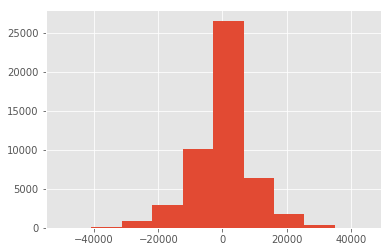

In [215]:
x['gold_diff'].hist()
plt.show()

In [216]:
x['radiant_xp'] = x['r1_xp'] + x['r2_xp'] + x['r3_xp'] + x['r4_xp'] + x['r5_xp']
x['dire_xp'] = x['d1_xp'] + x['d2_xp'] + x['d3_xp'] + x['d4_xp'] + x['d5_xp']
x['xp_diff'] = x['radiant_xp'] - x['dire_xp']
x.drop(['radiant_xp', 'dire_xp'], axis=1, inplace=True)

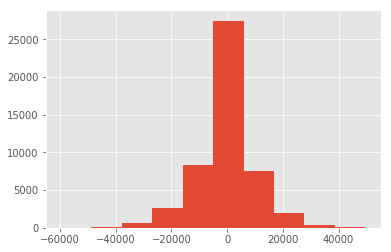

In [217]:
x['xp_diff'].hist()
plt.show()

In [218]:
x['radiant_kills'] = x['r1_kills'] + x['r2_kills'] + x['r3_kills'] + x['r4_kills'] + x['r5_kills']
x['dire_kills'] = x['d1_kills'] + x['d2_kills'] + x['d3_kills'] + x['d4_kills'] + x['d5_kills']
x['kills_diff'] = x['radiant_kills'] - x['dire_kills']
x.drop(['radiant_kills', 'dire_kills'], axis=1, inplace=True)

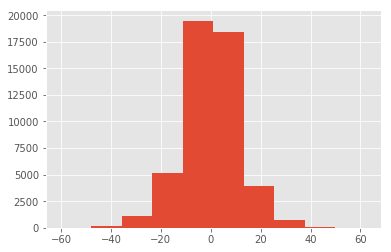

In [219]:
x['kills_diff'].hist()
plt.show()

In [220]:
x['radiant_lh'] = x['r1_lh'] + x['r2_lh'] + x['r3_lh'] + x['r4_lh'] + x['r5_lh']
x['dire_lh'] = x['d1_lh'] + x['d2_lh'] + x['d3_lh'] + x['d4_lh'] + x['d5_lh']
x['lh_diff'] = x['radiant_lh'] - x['dire_lh']
x.drop(['radiant_lh', 'dire_lh'], axis=1, inplace=True)

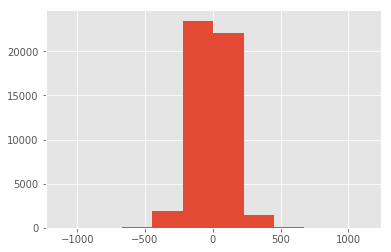

In [221]:
x['lh_diff'].hist()
plt.show()

In [222]:
#x['radiant_items'] = x['r1_items'] + x['r2_items'] + x['r3_items'] + x['r4_items'] + x['r5_items']
#x['dire_items'] = x['d1_items'] + x['d2_items'] + x['d3_items'] + x['d4_items'] + x['d5_items']
#x['items_diff'] = x['radiant_items'] - x['dire_items']
#x.drop(['radiant_items', 'dire_items'], axis=1, inplace=True)

In [223]:
#x['items_diff'].hist()
#plt.show()

In [224]:
x['radiant_deaths'] = x['r1_deaths'] + x['r2_deaths'] + x['r3_deaths'] + x['r4_deaths'] + x['r5_deaths']
x['dire_deaths'] = x['d1_deaths'] + x['d2_deaths'] + x['d3_deaths'] + x['d4_deaths'] + x['d5_deaths']
x['deaths_diff'] = x['radiant_deaths'] - x['dire_deaths']
x.drop(['radiant_deaths', 'dire_deaths'], axis=1, inplace=True)

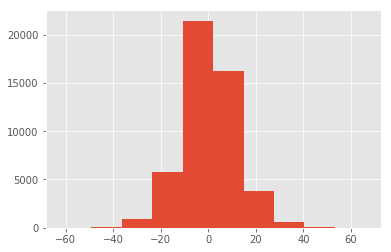

In [225]:
x['deaths_diff'].hist()
plt.show()

In [226]:
#x['r_time'] = x['radiant_bottle_time'] + x['radiant_courier_time'] + x['radiant_flying_courier_time'] + x['radiant_first_ward_time']
#x['d_time'] = x['dire_bottle_time'] + x['dire_courier_time'] + x['dire_flying_courier_time'] + x['dire_first_ward_time']
#x['time_diff'] = x['r_time'] - x['d_time']
#x.drop(['r_time', 'd_time'], axis=1, inplace=True)

In [227]:
#x['time_diff'].hist()
#plt.show()

In [228]:
#x['radiant_lvl'] = x['r1_xp'] + x['r2_xp'] + x['r3_xp'] + x['r4_xp'] + x['r5_xp']
#x['dire_lvl'] = x['d1_xp'] + x['d2_xp'] + x['d3_xp'] + x['d4_xp'] + x['d5_xp']
#x['lvl_diff'] = x['radiant_lvl'] - x['dire_lvl']
#x.drop(['radiant_lvl', 'dire_lvl'], axis=1, inplace=True)

In [229]:
#x['lvl_diff'].hist()
#plt.show()

In [230]:
x['radiant_health'] = x['r1_health'] + x['r2_health'] + x['r3_health'] + x['r4_health'] + x['r5_health']
x['dire_health'] = x['d1_health'] + x['d2_health'] + x['d3_health'] + x['d4_health'] + x['d5_health']
x['health_diff'] = x['radiant_health'] - x['dire_health']
x.drop(['radiant_health', 'dire_health'], axis=1, inplace=True)

In [231]:
x['radiant_avg_kda'] = x['r1_avg_kda'] + x['r2_avg_kda'] + x['r3_avg_kda'] + x['r4_avg_kda'] + x['r5_avg_kda']
x['dire_avg_kda'] = x['d1_avg_kda'] + x['d2_avg_kda'] + x['d3_avg_kda'] + x['d4_avg_kda'] + x['d5_avg_kda']
x['avg_kda_diff'] = x['radiant_avg_kda'] - x['dire_avg_kda']
x.drop(['radiant_avg_kda', 'dire_avg_kda'], axis=1, inplace=True)

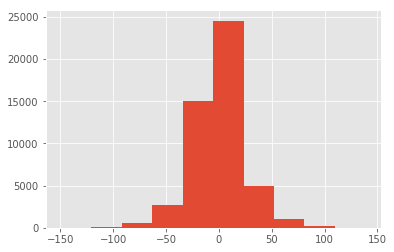

In [232]:
x['avg_kda_diff'].hist()
plt.show()

In [233]:
x['radiant_avg_tower_damage_per_min'] = x['r1_avg_tower_damage_per_min'] + x['r2_avg_tower_damage_per_min'] + x['r3_avg_tower_damage_per_min'] + x['r4_avg_tower_damage_per_min'] + x['r5_avg_tower_damage_per_min']
x['dire_avg_tower_damage_per_min'] = x['d1_avg_tower_damage_per_min'] + x['d2_avg_tower_damage_per_min'] + x['d3_avg_tower_damage_per_min'] + x['d4_avg_tower_damage_per_min'] + x['d5_avg_tower_damage_per_min']
x['avg_tower_damage_per_min_diff'] = x['radiant_avg_tower_damage_per_min'] - x['dire_avg_tower_damage_per_min']
x.drop(['radiant_avg_tower_damage_per_min', 'dire_avg_tower_damage_per_min'], axis=1, inplace=True)

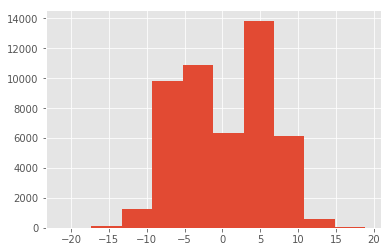

In [234]:
x['avg_tower_damage_per_min_diff'].hist()
plt.show()

берем нашу таблицу с признаками и колонку с правильными значениями (x, y) и делим на две части
часть обучающая и валидационная, чтоб посмотреть какое качество предсказаний мы можем достичь на наших данных
не делая финального предсказания

In [235]:
from sklearn.model_selection import train_test_split

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=.33, random_state=1)

In [236]:
x.shape

(49088, 616)

In [237]:
x_train.shape

(32888, 616)

In [238]:
x_validation.shape

(16200, 616)

заполняем нулями пропущенные значения которые у нас возникают

In [239]:
x_train = x_train.fillna(0)
x_validation = x_validation.fillna(0)

нормировка http://scikit-learn.org/stable/modules/preprocessing.html
нормировку можно не делать, зависит от задачи,
иногда нормировка приводит к лучшему результату, иногда к худшему

In [240]:
#from sklearn.preprocessing import StandardScaler, MinMaxScaler

#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_validation = scaler.fit_transform(x_validation)

заполним список признаков которые мы используем и приступаем к построению модели

In [241]:
features = list(x.columns)
print(features)

['lobby_type', 'r1_hero', 'r1_xp', 'r1_gold', 'r1_lh', 'r1_kills', 'r1_deaths', 'r1_items', 'r1_role', 'r1_avg_tower_damage_per_min', 'r1_avg_kda', 'r2_hero', 'r2_xp', 'r2_gold', 'r2_lh', 'r2_kills', 'r2_deaths', 'r2_items', 'r2_role', 'r2_avg_tower_damage_per_min', 'r2_avg_kda', 'r3_hero', 'r3_xp', 'r3_gold', 'r3_lh', 'r3_kills', 'r3_deaths', 'r3_items', 'r3_role', 'r3_avg_tower_damage_per_min', 'r3_avg_kda', 'r4_hero', 'r4_xp', 'r4_gold', 'r4_lh', 'r4_kills', 'r4_deaths', 'r4_items', 'r4_role', 'r4_avg_tower_damage_per_min', 'r4_avg_kda', 'r5_hero', 'r5_xp', 'r5_gold', 'r5_lh', 'r5_kills', 'r5_deaths', 'r5_items', 'r5_role', 'r5_avg_tower_damage_per_min', 'r5_avg_kda', 'd1_hero', 'd1_xp', 'd1_gold', 'd1_lh', 'd1_kills', 'd1_deaths', 'd1_items', 'd1_role', 'd1_avg_tower_damage_per_min', 'd1_avg_kda', 'd2_hero', 'd2_xp', 'd2_gold', 'd2_lh', 'd2_kills', 'd2_deaths', 'd2_items', 'd2_role', 'd2_avg_tower_damage_per_min', 'd2_avg_kda', 'd3_hero', 'd3_xp', 'd3_gold', 'd3_lh', 'd3_kills', 'd

In [242]:
#from sklearn.ensemble import GradientBoostingClassifier
#clf = GradientBoostingClassifier(n_estimators=500, max_depth=3, random_state=322)
#clf.fit(x_train, y_train)

In [243]:
#from sklearn.linear_model import LogisticRegression
#clf = LogisticRegression()
#clf.fit(x_train, y_train)

In [244]:
#from sklearn.naive_bayes import GaussianNB
#clf = GaussianNB()
#clf.fit(x_train, y_train)


In [245]:
#import lightgbm
#from lightgbm import LGBMClassifier
#clf = LGBMClassifier()
#LGBMClassifier.fit(x_train, y_train, x_train)

In [246]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier()
clf.fit(x_train, y_train)

0:	learn: 0.6904229	total: 665ms	remaining: 11m 4s
1:	learn: 0.6878693	total: 1.35s	remaining: 11m 16s
2:	learn: 0.6849397	total: 2.03s	remaining: 11m 15s
3:	learn: 0.6824490	total: 2.68s	remaining: 11m 7s
4:	learn: 0.6798804	total: 3.32s	remaining: 11m 1s
5:	learn: 0.6778484	total: 3.94s	remaining: 10m 53s
6:	learn: 0.6757054	total: 4.56s	remaining: 10m 46s
7:	learn: 0.6738636	total: 5.19s	remaining: 10m 43s
8:	learn: 0.6719970	total: 5.83s	remaining: 10m 41s
9:	learn: 0.6703627	total: 6.45s	remaining: 10m 38s
10:	learn: 0.6685411	total: 7.05s	remaining: 10m 33s
11:	learn: 0.6668538	total: 7.66s	remaining: 10m 30s
12:	learn: 0.6650798	total: 8.27s	remaining: 10m 28s
13:	learn: 0.6637303	total: 8.88s	remaining: 10m 25s
14:	learn: 0.6624217	total: 9.48s	remaining: 10m 22s
15:	learn: 0.6610851	total: 10.1s	remaining: 10m 18s
16:	learn: 0.6599499	total: 10.6s	remaining: 10m 14s
17:	learn: 0.6586014	total: 11.2s	remaining: 10m 12s
18:	learn: 0.6574436	total: 11.8s	remaining: 10m 10s
19:	le

In [247]:
from sklearn.metrics import accuracy_score

print('Train Accuracy:', accuracy_score(y_train, clf.predict(x_train)))
print('Validation Accuracy:', accuracy_score(y_validation, clf.predict(x_validation)))

Train Accuracy: 0.7063062515203113
Validation Accuracy: 0.6464814814814814


In [248]:
df_importances = pd.DataFrame.from_records([
    {'feature': feature_name, 'importance': importance}
    for feature_name, importance in zip(features, clf.feature_importances_)
])
df_importances = df_importances.set_index('feature')
df_importances = df_importances.sort_values('importance', ascending=False)

In [249]:
df_importances.sort_values('importance', ascending=False).head(50)

,importance
feature,
avg_kda_diff,10.986691
avg_tower_damage_per_min_diff,8.280154
kills_diff,3.657687
deaths_diff,3.200460
gold_diff,1.973467
d4_avg_kda,1.890446
r1_avg_kda,1.816668
r5_avg_kda,1.739520
r2_avg_kda,1.537332


загружаем данные

In [250]:
x_test = pd.read_csv('competition_data_v2/test_v2.csv', index_col=0)
y_submission = pd.read_csv('competition_data_v2/submission.csv', index_col=0)

In [251]:
x_test.shape

(49089, 378)

In [252]:
x_test = x_test.join(df_heroes.add_prefix('r1_'), on='r1_hero')
x_test = x_test.join(df_heroes.add_prefix('r2_'), on='r2_hero')
x_test = x_test.join(df_heroes.add_prefix('r3_'), on='r3_hero')
x_test = x_test.join(df_heroes.add_prefix('r4_'), on='r4_hero')
x_test = x_test.join(df_heroes.add_prefix('r5_'), on='r5_hero')
x_test = x_test.join(df_heroes.add_prefix('d1_'), on='d1_hero')
x_test = x_test.join(df_heroes.add_prefix('d2_'), on='d2_hero')
x_test = x_test.join(df_heroes.add_prefix('d3_'), on='d3_hero')
x_test = x_test.join(df_heroes.add_prefix('d4_'), on='d4_hero')
x_test = x_test.join(df_heroes.add_prefix('d5_'), on='d5_hero')







In [253]:
x_test['r1_lvl'] = x_test['r1_xp'].apply(xptolvl)
x_test['r2_lvl'] = x_test['r2_xp'].apply(xptolvl)
x_test['r3_lvl'] = x_test['r3_xp'].apply(xptolvl)
x_test['r4_lvl'] = x_test['r4_xp'].apply(xptolvl)
x_test['r5_lvl'] = x_test['r5_xp'].apply(xptolvl)
x_test['d1_lvl'] = x_test['d1_xp'].apply(xptolvl)
x_test['d2_lvl'] = x_test['d2_xp'].apply(xptolvl)
x_test['d3_lvl'] = x_test['d3_xp'].apply(xptolvl)
x_test['d4_lvl'] = x_test['d4_xp'].apply(xptolvl)
x_test['d5_lvl'] = x_test['d5_xp'].apply(xptolvl)

In [254]:
x_test['r1_health'] = 200 + 20*x_test['r1_lvl']*x_test['r1_str_gain'] + 20*x_test['r1_base_str']
x_test['r2_health'] = 200 + 20*x_test['r2_lvl']*x_test['r2_str_gain'] + 20*x_test['r2_base_str']
x_test['r3_health'] = 200 + 20*x_test['r3_lvl']*x_test['r3_str_gain'] + 20*x_test['r3_base_str']
x_test['r4_health'] = 200 + 20*x_test['r4_lvl']*x_test['r4_str_gain'] + 20*x_test['r4_base_str']
x_test['r5_health'] = 200 + 20*x_test['r5_lvl']*x_test['r5_str_gain'] + 20*x_test['r5_base_str']
x_test['d1_health'] = 200 + 20*x_test['d1_lvl']*x_test['d1_str_gain'] + 20*x_test['d1_base_str']
x_test['d2_health'] = 200 + 20*x_test['d2_lvl']*x_test['d2_str_gain'] + 20*x_test['d2_base_str']
x_test['d3_health'] = 200 + 20*x_test['d3_lvl']*x_test['d3_str_gain'] + 20*x_test['d3_base_str']
x_test['d4_health'] = 200 + 20*x_test['d4_lvl']*x_test['d4_str_gain'] + 20*x_test['d4_base_str']
x_test['d5_health'] = 200 + 20*x_test['d5_lvl']*x_test['d5_str_gain'] + 20*x_test['d5_base_str']

In [256]:
x_test.drop(['r1_attack_type', 'r1_cm_enabled', 'r1_icon', 'r1_img', 'r1_localized_name', 'r1_name', 'r1_roles', 'r1_primary_attr',
       'r2_attack_type', 'r2_cm_enabled', 'r2_icon', 'r2_img', 'r2_localized_name', 'r2_name', 'r2_roles', 'r2_primary_attr',
       'r3_attack_type', 'r3_cm_enabled', 'r3_icon', 'r3_img', 'r3_localized_name', 'r3_name', 'r3_roles', 'r3_primary_attr',
       'r4_attack_type', 'r4_cm_enabled', 'r4_icon', 'r4_img', 'r4_localized_name', 'r4_name', 'r4_roles', 'r4_primary_attr',
       'r5_attack_type', 'r5_cm_enabled', 'r5_icon', 'r5_img', 'r5_localized_name', 'r5_name', 'r5_roles', 'r5_primary_attr',
       'd1_attack_type', 'd1_cm_enabled', 'd1_icon', 'd1_img', 'd1_localized_name', 'd1_name', 'd1_roles', 'd1_primary_attr',
       'd2_attack_type', 'd2_cm_enabled', 'd2_icon', 'd2_img', 'd2_localized_name', 'd2_name', 'd2_roles', 'd2_primary_attr',
       'd3_attack_type', 'd3_cm_enabled', 'd3_icon', 'd3_img', 'd3_localized_name', 'd3_name', 'd3_roles', 'd3_primary_attr',
       'd4_attack_type', 'd4_cm_enabled', 'd4_icon', 'd4_img', 'd4_localized_name', 'd4_name', 'd4_roles', 'd4_primary_attr',
       'd5_attack_type', 'd5_cm_enabled', 'd5_icon', 'd5_img', 'd5_localized_name', 'd5_name', 'd5_roles', 'd5_primary_attr',
            
       ], axis=1 , inplace=True)

In [257]:
x_train.shape

(32888, 616)

In [262]:
x_test['radiant_avg_kda'] = x_test['r1_avg_kda'] + x_test['r2_avg_kda'] + x_test['r3_avg_kda'] + x_test['r4_avg_kda'] + x_test['r5_avg_kda']
x_test['dire_avg_kda'] = x_test['d1_avg_kda'] + x_test['d2_avg_kda'] + x_test['d3_avg_kda'] + x_test['d4_avg_kda'] + x_test['d5_avg_kda']
x_test['avg_kda_diff'] = x_test['radiant_avg_kda'] - x_test['dire_avg_kda']


x_test['radiant_avg_tower_damage_per_min'] = x_test['r1_avg_tower_damage_per_min'] + x_test['r2_avg_tower_damage_per_min'] + x_test['r3_avg_tower_damage_per_min'] + x_test['r4_avg_tower_damage_per_min'] + x_test['r5_avg_tower_damage_per_min']
x_test['dire_avg_tower_damage_per_min'] = x_test['d1_avg_tower_damage_per_min'] + x_test['d2_avg_tower_damage_per_min'] + x_test['d3_avg_tower_damage_per_min'] + x_test['d4_avg_tower_damage_per_min'] + x_test['d5_avg_tower_damage_per_min']
x_test['avg_tower_damage_per_min_diff'] = x_test['radiant_avg_tower_damage_per_min'] - x_test['dire_avg_tower_damage_per_min']
x_test['radiant_deaths'] = x_test['r1_deaths'] + x_test['r2_deaths'] + x_test['r3_deaths'] + x_test['r4_deaths'] + x_test['r5_deaths']
x_test['dire_deaths'] = x_test['d1_deaths'] + x_test['d2_deaths'] + x_test['d3_deaths'] + x_test['d4_deaths'] + x_test['d5_deaths']
x_test['deaths_diff'] = x_test['radiant_deaths'] - x_test['dire_deaths']

x_test['radiant_health'] = x_test['r1_health'] + x_test['r2_health'] + x_test['r3_health'] + x_test['r4_health'] + x_test['r5_health']
x_test['dire_health'] = x_test['d1_health'] + x_test['d2_health'] + x_test['d3_health'] + x_test['d4_health'] + x_test['d5_health']
x_test['health_diff'] = x_test['radiant_health'] - x_test['dire_health']

x_test['radiant_gold'] = x_test['r1_gold'] + x_test['r2_gold'] + x_test['r3_gold'] + x_test['r4_gold'] + x_test['r5_gold']
x_test['dire_gold'] = x_test['d1_gold'] + x_test['d2_gold'] + x_test['d3_gold'] + x_test['d4_gold'] + x_test['d5_gold']
x_test['gold_diff'] = x_test['radiant_gold'] - x_test['dire_gold']
x_test['radiant_kills'] = x_test['r1_kills'] + x_test['r2_kills'] + x_test['r3_kills'] + x_test['r4_kills'] + x_test['r5_kills']
x_test['dire_kills'] = x_test['d1_kills'] + x_test['d2_kills'] + x_test['d3_kills'] + x_test['d4_kills'] + x_test['d5_kills']
x_test['kills_diff'] = x_test['radiant_kills'] - x_test['dire_kills']
x_test['radiant_xp'] = x_test['r1_xp'] + x_test['r2_xp'] + x_test['r3_xp'] + x_test['r4_xp'] + x_test['r5_xp']
x_test['dire_xp'] = x_test['d1_xp'] + x_test['d2_xp'] + x_test['d3_xp'] + x_test['d4_xp'] + x_test['d5_xp']
x_test['xp_diff'] = x_test['radiant_xp'] - x_test['dire_xp']
x_test['radiant_lh'] = x_test['r1_lh'] + x_test['r2_lh'] + x_test['r3_lh'] + x_test['r4_lh'] + x_test['r5_lh']
x_test['dire_lh'] = x_test['d1_lh'] + x_test['d2_lh'] + x_test['d3_lh'] + x_test['d4_lh'] + x_test['d5_lh']
x_test['lh_diff'] = x_test['radiant_lh'] - x_test['dire_lh']
#x_test['radiant_lh'] = x_test['r1_lh'] + x_test['r2_lh'] + x_test['r3_lh'] + x_test['r4_lh'] + x_test['r5_lh']
#x_test['dire_lh'] = x_test['d1_lh'] + x_test['d2_lh'] + x_test['d3_lh'] + x_test['d4_lh'] + x_test['d5_lh']
#x_test['lh_diff'] = x_test['radiant_lh'] - x_test['dire_lh']
#x_test['radiant_items'] = x_test['r1_items'] + x_test['r2_items'] + x_test['r3_items'] + x_test['r4_items'] + x_test['r5_items']
#x_test['dire_items'] = x_test['d1_items'] + x_test['d2_items'] + x_test['d3_items'] + x_test['d4_items'] + x_test['d5_items']
#x_test['items_diff'] = x_test['radiant_items'] - x_test['dire_items']
x_test.drop(['radiant_gold', 'dire_gold', 'radiant_kills', 'dire_kills', 'radiant_avg_tower_damage_per_min',
             'dire_avg_tower_damage_per_min', 'radiant_avg_kda', 'dire_avg_kda',
             'radiant_health', 'dire_health', 'radiant_deaths', 'dire_deaths',
            'radiant_xp', 'dire_xp', 'radiant_lh', 'dire_lh'], axis=1, inplace=True)

In [263]:
x_test = x_test.fillna(0)

In [264]:
x_test = x_test[features]

In [265]:
x_test.shape, x_train.shape

((49089, 616), (32888, 616))

In [266]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
x_test = scaler.fit_transform(x_test)
x_validation = scaler.fit_transform(x_validation)

In [267]:
y_submission['radiant_won'] = clf.predict(x_test)



In [268]:
y_submission.astype(int)

,radiant_won
fight_id,
49088,0
49089,1
49090,0
49091,0
49092,0
49093,0
49094,0
49095,1
49096,0


In [269]:
import time
import os

current_timestamp = int(time.time())
submission_path = 'submissions/{}.csv'.format(current_timestamp)

if not os.path.exists('submissions'):
    os.makedirs('submissions')

print(submission_path)
y_submission.astype(int).to_csv(submission_path, index=True)



submissions/1523619799.csv
